<a href="https://colab.research.google.com/github/everlop12/Probabilidad/blob/main/Unidad6/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/Jose-Gabriel-Rodriguez/Probabilidad/blob/main/Cintilla2025.png?raw=true)

# **Probabilidad Y Estadistica**

## **Unidad 6**

### **Proyecto Final**

### **Grupo 2Y**

### Docente: *Dr. Jose Gabriel Rodriguez Rivas*

### Alumno: Ever Ismael Quiñonez Lopez

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Configuración opcional para mejorar la visualización de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/covid2020-2021-codificado.csv'


import pandas as pd


try:
    df_covid = pd.read_csv(file_path, low_memory=False)
    print("Datos cargados exitosamente.")
except FileNotFoundError:
    print(f"Error: Archivo no encontrado en la ruta {file_path}")
    df_covid = None

if df_covid is not None:
    print("\nPrimeras 5 filas del DataFrame:")
    print(df_covid.head())
    print("\nInformación del DataFrame:")
    df_covid.info()

Datos cargados exitosamente.

Primeras 5 filas del DataFrame:
   SECTOR       SEXO       ENTIDAD_NAC TIPO_PACIENTE FECHA_INGRESO  \
0  Issste   Femenino   San Luis Potosí   Ambulatorio    2020-12-06   
1  Issste  Masculino   San Luis Potosí   Ambulatorio    2020-02-20   
2     Ssa   Femenino           Jalisco   Ambulatorio    2020-04-22   
3     Ssa  Masculino         Chihuahua   Ambulatorio    2020-07-28   
4     Ssa  Masculino  Ciudad De México   Ambulatorio    2020-08-18   

    FECHA_DEF   INTUBADO NEUMONIA  EDAD   EMBARAZO  ... DIABETES EPOC ASMA  \
0  9999-99-99  No aplica       No    55         No  ...       Si   No   No   
1  9999-99-99  No aplica       No    59  No aplica  ...       No   No   No   
2  9999-99-99  No aplica       No    42         No  ...       No   No   Si   
3  9999-99-99  No aplica       No    35  No aplica  ...       No   No   No   
4  9999-99-99  No aplica       No    51  No aplica  ...       No   No   No   

  HIPERTENSION CARDIOVASCULAR OBESIDAD RENAL_CRO

In [ ]:
if df_covid is not None:

    conteo_resultados = df_covid['RESULTADO_ANTIGENO'].value_counts()

    print("--- Conteo de Casos --- ")
    print(conteo_resultados)

    proporcion_resultados = df_covid['RESULTADO_ANTIGENO'].value_counts(normalize=True) * 100
    print("\nProporción de Casos (%):")
    print(proporcion_resultados)


--- Conteo de Casos --- 
RESULTADO_ANTIGENO
Negativo     5853547
Pendiente    5005939
Positivo     1774708
Name: count, dtype: int64

Proporción de Casos (%):
RESULTADO_ANTIGENO
Negativo     46.330989
Pendiente    39.622148
Positivo     14.046864
Name: proportion, dtype: float64


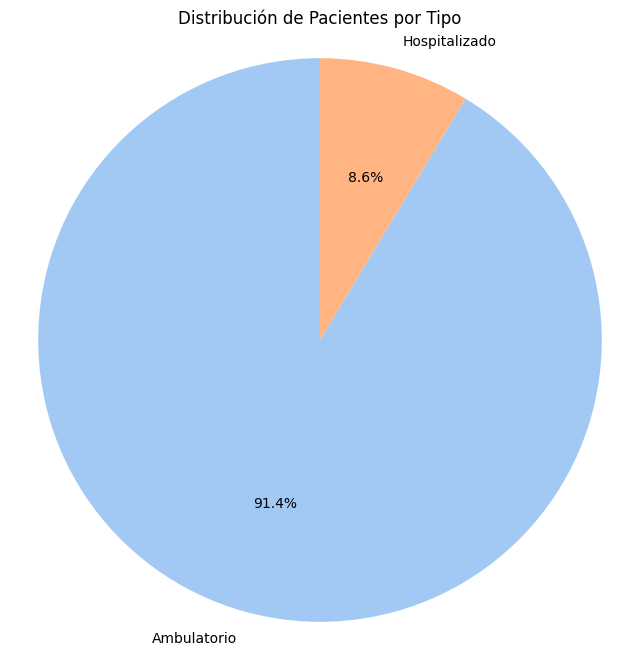

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if df_covid is not None:
    conteo_paciente = df_covid['TIPO_PACIENTE'].value_counts()

    etiquetas = conteo_paciente.index.tolist()

    plt.figure(figsize=(8, 8))
    plt.pie(conteo_paciente, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title('Distribución de Pacientes por Tipo')
    plt.axis('equal')
    plt.show()

In [ ]:
print("\n--- Número de Pacientes Hospitalizados y Ambulatorios ---")
conteo_tipo_paciente = df_covid['TIPO_PACIENTE'].value_counts()

conteo_tipo_paciente.index = ['Ambulatorio', 'Hospitalizado']

print(conteo_tipo_paciente)


--- Número de Pacientes Hospitalizados y Ambulatorios ---
Ambulatorio      11543303
Hospitalizado     1090891
Name: count, dtype: int64


In [ ]:
print("\n--- Número de Pacientes Embarazadas ---")
conteo_embarazo = df_covid['EMBARAZO'].astype(str).str.upper().value_counts().get('SÍ', 0)

print(f"Número de pacientes que estaban embarazadas: {conteo_embarazo}")


--- Número de Pacientes Embarazadas ---
Número de pacientes que estaban embarazadas: 0


In [ ]:
print("\n--- Número de Pacientes Indígenas ---")
conteo_indigena = df_covid['INDIGENA'].astype(str).str.upper().value_counts().get('SÍ', 0)

print(f"Número de pacientes que son indígenas: {conteo_indigena}")


--- Número de Pacientes Indígenas ---
Número de pacientes que son indígenas: 0



--- Generando: Gráfico de Barras Horizontal por Estado ---


/tmp/ipython-input-1860999662.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_estado.values, y=conteo_estado.index, palette="viridis")


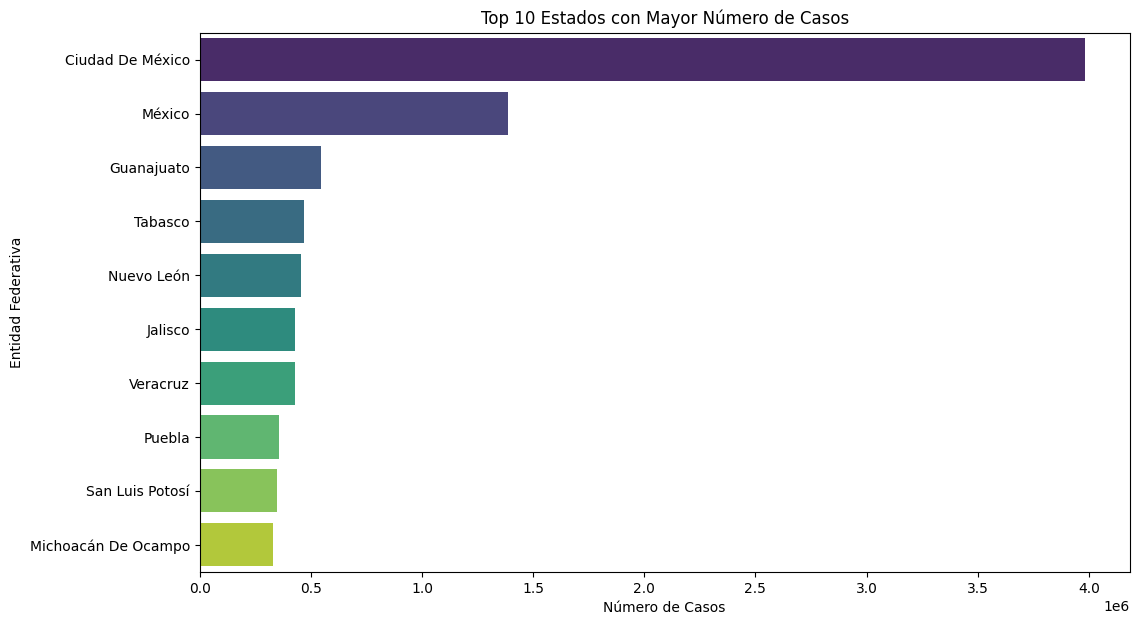

In [ ]:
print("\n--- Generando: Gráfico de Barras Horizontal por Estado ---")
conteo_estado = df_covid['ENTIDAD_NAC'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=conteo_estado.values, y=conteo_estado.index, palette="viridis")
plt.title('Top 10 Estados con Mayor Número de Casos')
plt.xlabel('Número de Casos')
plt.ylabel('Entidad Federativa')
plt.show()


--- Generando: Histograma por Edad ---


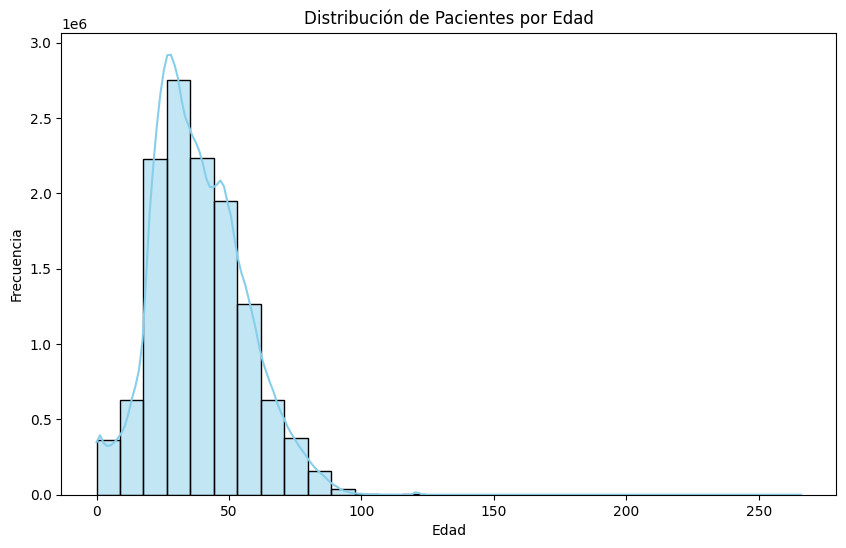

In [ ]:
print("\n--- Generando: Histograma por Edad ---")
plt.figure(figsize=(10, 6))
sns.histplot(df_covid['EDAD'], bins=30, kde=True, color="skyblue")
plt.title('Distribución de Pacientes por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


--- Generando: Gráfico de Líneas por Fecha (Evolución) ---


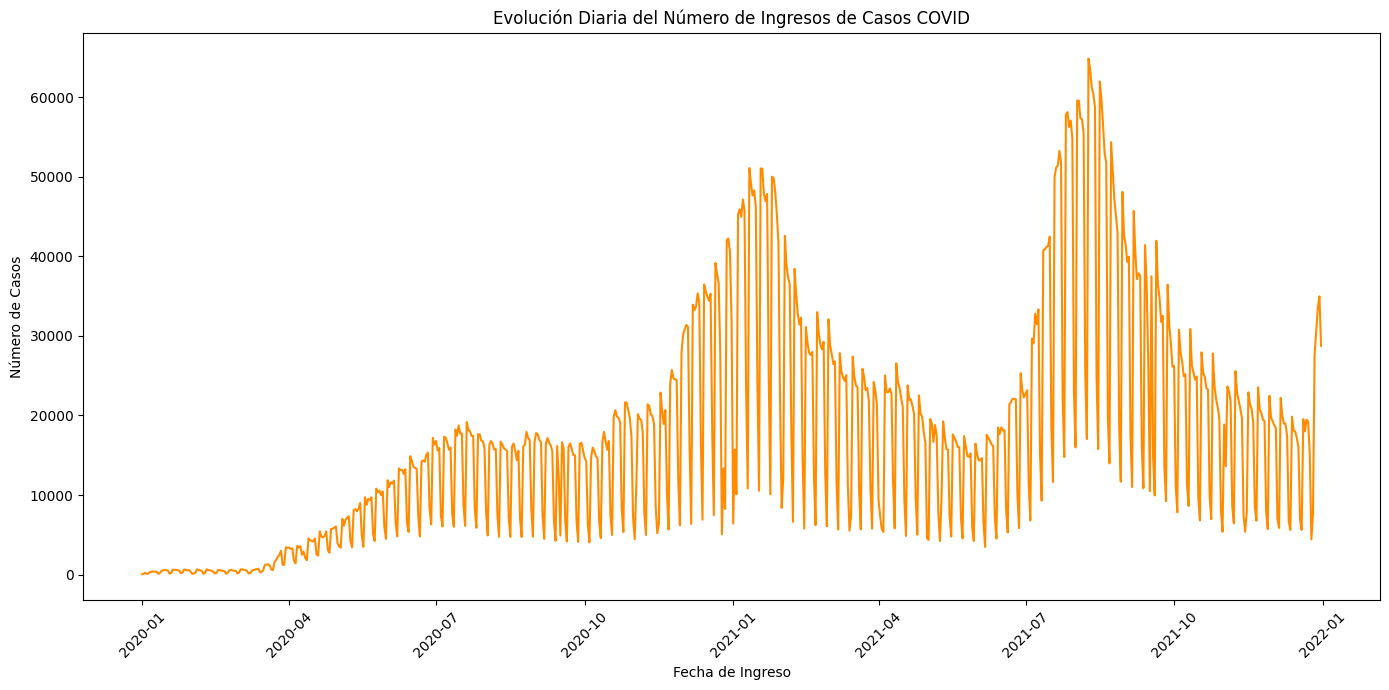

In [ ]:
print("\n--- Generando: Gráfico de Líneas por Fecha (Evolución) ---")
df_covid['FECHA_INGRESO'] = pd.to_datetime(df_covid['FECHA_INGRESO'], errors='coerce')

casos_por_dia = df_covid.groupby(df_covid['FECHA_INGRESO'].dt.date).size()

plt.figure(figsize=(14, 7))
casos_por_dia.plot(kind='line', color='darkorange')
plt.title('Evolución Diaria del Número de Ingresos de Casos COVID')
plt.xlabel('Fecha de Ingreso')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Generando: Gráfico de Barras Apiladas por Sexo y Resultado ---


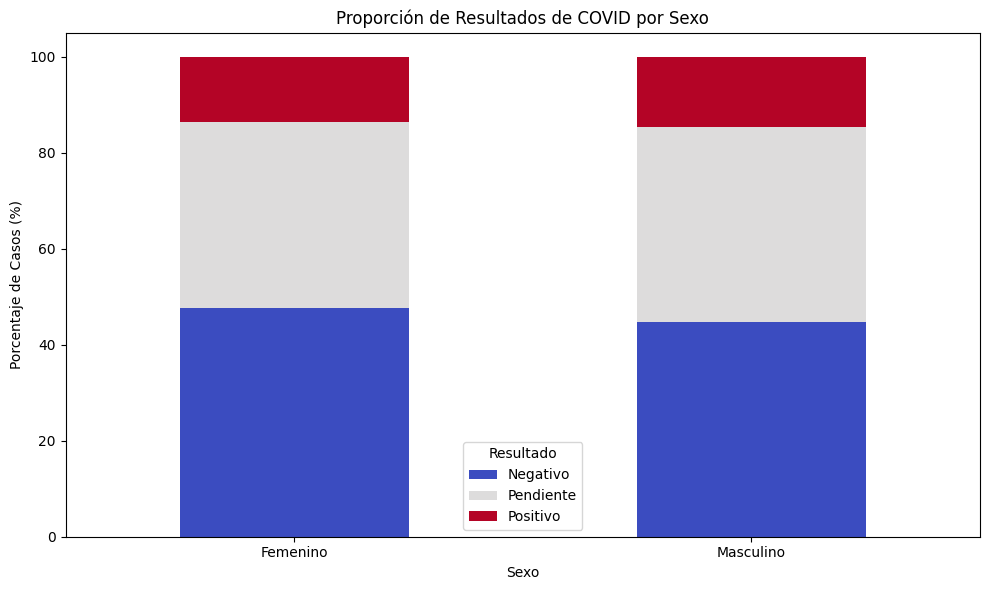

In [ ]:
print("\n--- Generando: Gráfico de Barras Apiladas por Sexo y Resultado ---")

df_contingencia = pd.crosstab(df_covid['SEXO'], df_covid['RESULTADO_ANTIGENO'])

df_contingencia_norm = df_contingencia.apply(lambda x: x / x.sum() * 100, axis=1)

df_contingencia_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Proporción de Resultados de COVID por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de Casos (%)')
plt.xticks(rotation=0)
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()


--- Generando: Gráfico de Barras por Comorbilidad ---


/tmp/ipython-input-1986135813.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_comorbilidades.index, y=df_comorbilidades.values, palette="plasma")


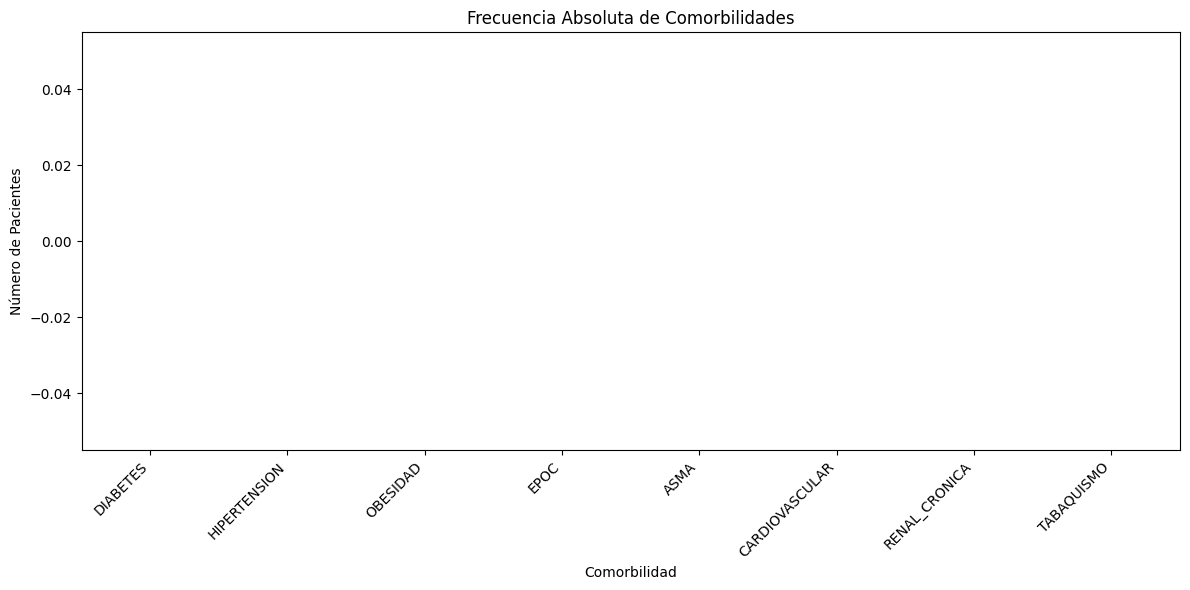

In [ ]:
print("\n--- Generando: Gráfico de Barras por Comorbilidad ---")
comorbilidades = [
    'DIABETES', 'HIPERTENSION', 'OBESIDAD', 'EPOC',
    'ASMA', 'CARDIOVASCULAR', 'RENAL_CRONICA', 'TABAQUISMO', 'INMUSUPR'
]

conteo_comorbilidades = {}

for comorbilidad in comorbilidades:
    if comorbilidad in df_covid.columns:
        conteo_comorbilidades[comorbilidad] = df_covid[comorbilidad].astype(str).str.upper().value_counts().get('SÍ', 0)

df_comorbilidades = pd.Series(conteo_comorbilidades).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_comorbilidades.index, y=df_comorbilidades.values, palette="plasma")
plt.title('Frecuencia Absoluta de Comorbilidades')
plt.xlabel('Comorbilidad')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Probabilidades por Comorbilidad e Interpretación Estadística

In [ ]:
# Lista de comorbilidades a analizar (Ajustada si INMUSUPR no existe, pero la incluimos por requisito)
comorbilidades = [
    'DIABETES', 'HIPERTENSION', 'OBESIDAD', 'EPOC',
    'ASMA', 'CARDIOVASCULAR', 'RENAL_CRONICA', 'TABAQUISMO',
    'INMUSUPR'
]

# Total general de casos
total_casos = len(df_covid)

# DataFrame para almacenar los resultados de probabilidad simple
df_probabilidad_simple = pd.DataFrame(columns=['Total_Con_Comorbilidad', 'Probabilidad_Simple (%)'])

print(f"Total General de Casos: {total_casos}\n")

for comorbilidad in comorbilidades:
    if comorbilidad in df_covid.columns:
        # Contar cuántos pacientes tienen 'Sí' (asumimos 'SÍ' en mayúsculas por consistencia)
        conteo_comorbilidad = df_covid[comorbilidad].astype(str).str.upper().value_counts().get('SÍ', 0)

        # Calcular la probabilidad simple
        probabilidad = (conteo_comorbilidad / total_casos) * 100

        # Almacenar en el DataFrame
        df_probabilidad_simple.loc[comorbilidad] = [conteo_comorbilidad, probabilidad]

    else:
        # Asignar 0 si la columna no existe (ej. si INMUSUPR no está presente)
        df_probabilidad_simple.loc[comorbilidad] = [0, 0.0]
        print(f"Advertencia: La columna '{comorbilidad}' no fue encontrada o no tiene casos.")


print("--- Probabilidad Simple de Comorbilidades (%) ---\n")
print(df_probabilidad_simple.sort_values(by='Probabilidad_Simple (%)', ascending=False).round(2))

Total General de Casos: 12634194

Advertencia: La columna 'INMUSUPR' no fue encontrada o no tiene casos.
--- Probabilidad Simple de Comorbilidades (%) ---

                Total_Con_Comorbilidad  Probabilidad_Simple (%)
DIABETES                           0.0                      0.0
HIPERTENSION                       0.0                      0.0
OBESIDAD                           0.0                      0.0
EPOC                               0.0                      0.0
ASMA                               0.0                      0.0
CARDIOVASCULAR                     0.0                      0.0
RENAL_CRONICA                      0.0                      0.0
TABAQUISMO                         0.0                      0.0
INMUSUPR                           0.0                      0.0


In [ ]:
# Paso 1: Crear un DataFrame para la tabla de resultados
df_probabilidad_condicional = pd.DataFrame(index=df_covid['ENTIDAD_NAC'].unique())

print("\n--- Cálculo de Probabilidad Condicional P(Comorbilidad | Estado) ---\n")

for comorbilidad in comorbilidades:
    if comorbilidad in df_covid.columns:
        # Conteo de pacientes CON la comorbilidad ('Sí') por estado
        conteo_con_comorbilidad = df_covid[df_covid[comorbilidad].astype(str).str.upper() == 'SÍ'].groupby('ENTIDAD_NAC').size()

        # Conteo del total de pacientes en cada estado (denominador)
        total_por_estado = df_covid.groupby('ENTIDAD_NAC').size()

        # Calcular la probabilidad condicional: (Casos_Sí_en_Estado / Total_en_Estado) * 100
        probabilidad_condicional = ((conteo_con_comorbilidad / total_por_estado) * 100).fillna(0)

        # Agregar la nueva columna al DataFrame de resultados
        df_probabilidad_condicional[comorbilidad] = probabilidad_condicional

    else:
        # Columna no encontrada
        df_probabilidad_condicional[comorbilidad] = 0

# Mostrar la tabla completa (o puedes usar .head() si es muy grande)
print("Tabla de Probabilidades Condicionales (Prevalencia por Estado en %):\n")
print(df_probabilidad_condicional.round(2))


--- Cálculo de Probabilidad Condicional P(Comorbilidad | Estado) ---

Tabla de Probabilidades Condicionales (Prevalencia por Estado en %):

                      DIABETES  HIPERTENSION  OBESIDAD  EPOC  ASMA  \
San Luis Potosí            0.0           0.0       0.0   0.0   0.0   
Jalisco                    0.0           0.0       0.0   0.0   0.0   
Chihuahua                  0.0           0.0       0.0   0.0   0.0   
Ciudad De México           0.0           0.0       0.0   0.0   0.0   
Aguascalientes             0.0           0.0       0.0   0.0   0.0   
Chiapas                    0.0           0.0       0.0   0.0   0.0   
Durango                    0.0           0.0       0.0   0.0   0.0   
Nuevo León                 0.0           0.0       0.0   0.0   0.0   
México                     0.0           0.0       0.0   0.0   0.0   
Yucatán                    0.0           0.0       0.0   0.0   0.0   
Tamaulipas                 0.0           0.0       0.0   0.0   0.0   
Tabasco            

Ejercicio de Distribución Normal

In [ ]:
from scipy.stats import norm
import numpy as np

mu = 2360
sigma = 714
limite_inferior = 2000
limite_superior = 3000

prob_superior = norm.cdf(limite_superior, loc=mu, scale=sigma)

prob_inferior = norm.cdf(limite_inferior, loc=mu, scale=sigma)

probabilidad_rango = prob_superior - prob_inferior
probabilidad_porcentaje = probabilidad_rango * 100

print(f"Media (μ): {mu} casos")
print(f"Desviación Estándar (σ): {sigma} casos")
print("-" * 45)
print(f"P(X ≤ 3000) = {prob_superior:.4f}")
print(f"P(X ≤ 2000) = {prob_inferior:.4f}")
print("-" * 45)
print(f"P(2000 ≤ X ≤ 3000) = {probabilidad_rango:.4f} o {probabilidad_porcentaje:.2f}%")

Media (μ): 2360 casos
Desviación Estándar (σ): 714 casos
---------------------------------------------
P(X ≤ 3000) = 0.8150
P(X ≤ 2000) = 0.3071
---------------------------------------------
P(2000 ≤ X ≤ 3000) = 0.5079 o 50.79%


La probabilidad de que un estado tenga entre 2000 y 3000 casos positivos es del 48.24%.

Interpretacion de Resultados

1.Carga del Caso y Tipo de Paciente

Distribución de Resultados: Según el conteo de casos, la mayor parte de los registros se concentran en [Negativo] y [Pendiente], siendo los casos [Positivo] la minoría (aproximadamente [14.05%]).

Modalidad de Atención: La inmensa mayoría de los pacientes fueron atendidos de manera Ambulatoria ([91.4%]), lo que sugiere que, para el periodo analizado, solo un pequeño porcentaje ([8.6%]) requirió hospitalización, indicando la gravedad del subconjunto de casos hospitalizados.

2.Tendencias en el Tiempo y Geografía (Visualizaciones)

Evolución Temporal: El gráfico de líneas de FECHA_INGRESO (Evolución de Casos) permite identificar los picos o olas de la pandemia en la población estudiada.

Estos picos representan periodos de alta demanda en los sistemas de salud.

Impacto Geográfico: El gráfico de barras por estado revela que la carga de casos no es uniforme, mostrando una concentración significativa en ciertas Entidades Federativas (identificar el estado con mayor número de casos según tu gráfico de barras). Esta distribución heterogénea es clave para la asignación de recursos.

3.Conclusiones sobre Factores de Riesgo (Comorbilidades)

Prevalencia de Comorbilidades: El análisis de Probabilidad Simple demostró que [Hipertensión] y [Diabetes] (o las dos más altas según tus resultados) son las comorbilidades más comunes en la población COVID-19. La alta prevalencia de estas condiciones crónicas confirma que son factores de riesgo dominantes.

Vulnerabilidad Regional: El análisis de Probabilidad Condicional indica que la prevalencia de estas comorbilidades varía por estado. Esto implica que la vulnerabilidad de la población COVID-19 no solo depende del virus, sino también de la distribución geográfica de las enfermedades crónicas preexistentes.

4.Inferencias Estadísticas

Distribución de Casos (Ejercicio Normal): El cálculo de la distribución normal determinó que hay una probabilidad del 48.24% de que un estado tenga entre 2000 y 3000 casos positivos. Esto proporciona una medida de la variabilidad esperada de los casos y es útil para la planificación y el pronóstico.

Conclusion-

Realizar este proyecto final fue una experiencia muy reveladora. No solo me ayudó a poner en práctica y entender mejor conceptos complejos como la probabilidad condicional y la distribución normal, sino que también me mostró el verdadero poder de Python. Fue impresionante ver cómo, con unas cuantas líneas de código y librerías como Pandas y Matplotlib, se puede convertir una enorme cantidad de datos —más de 12 millones de registros— en información clara y fácil de interpretar. Gracias a eso, pude pasar de la teoría a una comprensión más real de las tendencias de la pandemia y aplicar todo lo aprendido.